In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [4]:
df = pd.read_csv(r'C:\Users\Linds\Repos\East_River\Data\Raw\DSU_wx_history.csv')

In [5]:
#check for missing values
print(df.isnull().sum())

location                0
obs_tms_lcl             0
temperature             0
wind_speed              0
wind_degree             0
wind_dir                0
weather_descriptions    0
precip                  0
humidity                0
visibility              0
pressure                0
cloudcover              0
heatindex               0
dewpoint                0
windchill               0
windgust                0
feelslike               0
uv_index                0
dtype: int64


In [6]:
# check for duplicate rows in the dataframe df
duplicate_rows = df[df.duplicated()]
print("Number of duplicate rows in df:", duplicate_rows.shape[0])
print(duplicate_rows)

Number of duplicate rows in df: 0
Empty DataFrame
Columns: [location, obs_tms_lcl, temperature, wind_speed, wind_degree, wind_dir, weather_descriptions, precip, humidity, visibility, pressure, cloudcover, heatindex, dewpoint, windchill, windgust, feelslike, uv_index]
Index: []


Summary Statistics for Key Weather Variables:
        temperature      dewpoint     windchill    wind_speed      humidity  \
count  6.084216e+06  6.084216e+06  6.084216e+06  6.084216e+06  6.084216e+06   
mean   4.814548e+01  3.605922e+01  4.355454e+01  1.010128e+01  6.806459e+01   
std    2.375386e+01  1.979007e+01  2.819953e+01  4.907735e+00  2.207467e+01   
min   -3.100000e+01 -3.500000e+01 -5.100000e+01  0.000000e+00  6.000000e+00   
25%    3.000000e+01  2.300000e+01  2.300000e+01  6.000000e+00  5.100000e+01   
50%    5.000000e+01  3.600000e+01  4.500000e+01  9.000000e+00  7.100000e+01   
75%    6.800000e+01  5.400000e+01  6.800000e+01  1.300000e+01  8.800000e+01   
max    1.130000e+02  8.100000e+01  1.130000e+02  3.700000e+01  1.000000e+02   

           pressure  
count  6.084216e+06  
mean   2.998166e+01  
std    2.584428e-01  
min    2.888000e+01  
25%    2.983000e+01  
50%    2.997000e+01  
75%    3.012000e+01  
max    3.098000e+01  


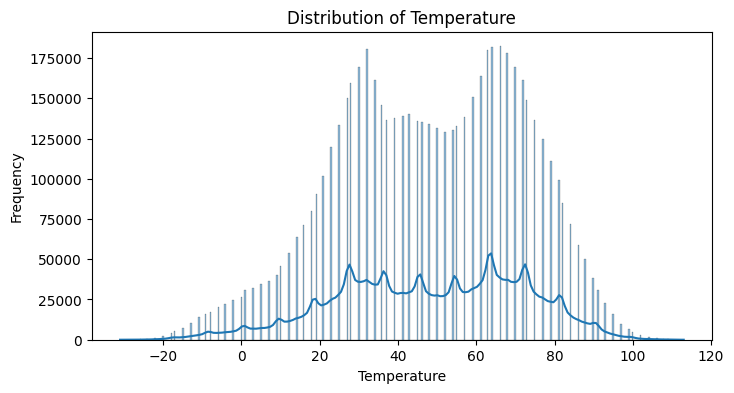

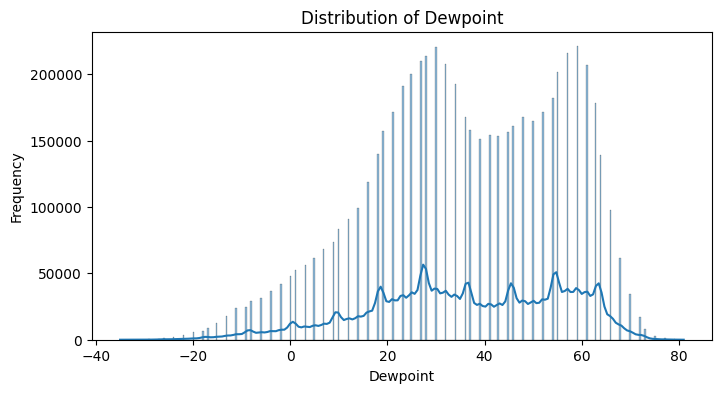

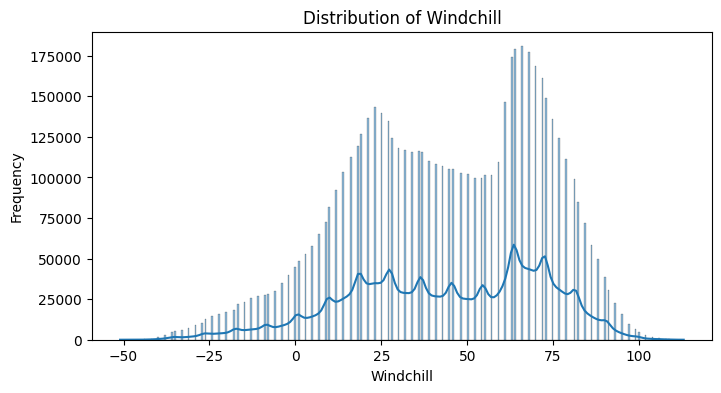

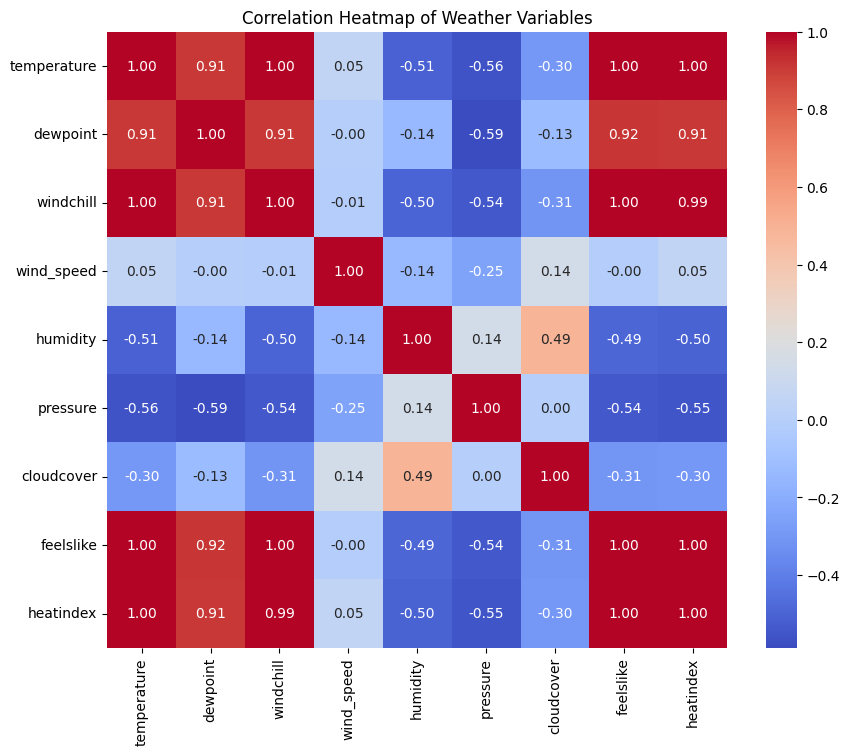

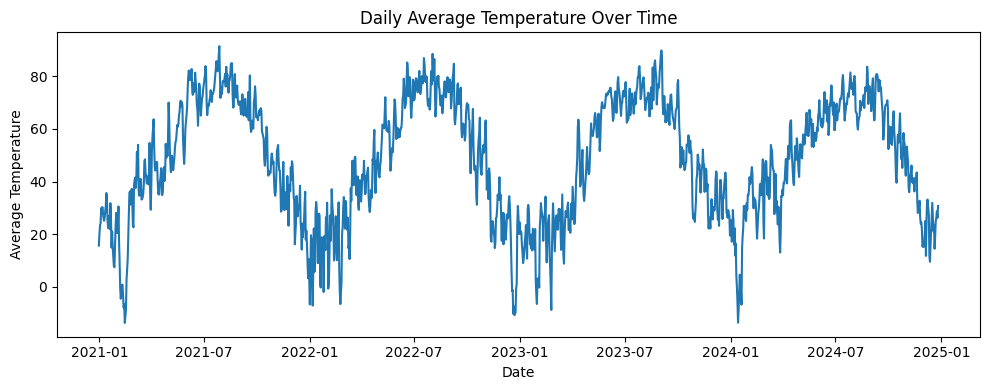

In [7]:
# Convert the observation timestamp to datetime and create a date column for daily aggregation
df['obs_tms_lcl'] = pd.to_datetime(df['obs_tms_lcl'])
df['date'] = df['obs_tms_lcl'].dt.date

# Display summary statistics for key weather variables
weather_vars = ['temperature', 'dewpoint', 'windchill', 'wind_speed', 'humidity', 'pressure']
print("Summary Statistics for Key Weather Variables:")
print(df[weather_vars].describe())

# Plot distributions for temperature, dewpoint, and windchill
for var in ['temperature', 'dewpoint', 'windchill']:
    plt.figure(figsize=(8, 4))
    sns.histplot(df[var].dropna(), kde=True)
    plt.title(f'Distribution of {var.capitalize()}')
    plt.xlabel(var.capitalize())
    plt.ylabel('Frequency')
    plt.show()

# Calculate and plot the correlation heatmap for weather-related variables
corr_vars = ['temperature', 'dewpoint', 'windchill', 'wind_speed', 'humidity', 'pressure', 'cloudcover', 'feelslike', 'heatindex']
corr_matrix = df[corr_vars].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Correlation Heatmap of Weather Variables')
plt.show()

# Aggregate daily average temperature to investigate temporal trends
daily_temperature = df.groupby('date')['temperature'].mean()

plt.figure(figsize=(10, 4))
daily_temperature.plot()
plt.title('Daily Average Temperature Over Time')
plt.xlabel('Date')
plt.ylabel('Average Temperature')
plt.tight_layout()
plt.show()

In [8]:
# Check for outliers using the IQR method on key weather variables
weather_vars = ['temperature', 'dewpoint', 'windchill', 'wind_speed', 'humidity', 'pressure', 'cloudcover', 'feelslike', 'heatindex']

for var in weather_vars:
    if var in df.columns:
        Q1 = df[var].quantile(0.25)
        Q3 = df[var].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        outliers = df[(df[var] < lower_bound) | (df[var] > upper_bound)]
        print(f"{var}: {outliers.shape[0]} outliers found")

temperature: 30 outliers found
dewpoint: 5073 outliers found
windchill: 23 outliers found
wind_speed: 63256 outliers found
humidity: 0 outliers found
pressure: 212793 outliers found
cloudcover: 0 outliers found
feelslike: 23 outliers found
heatindex: 30 outliers found


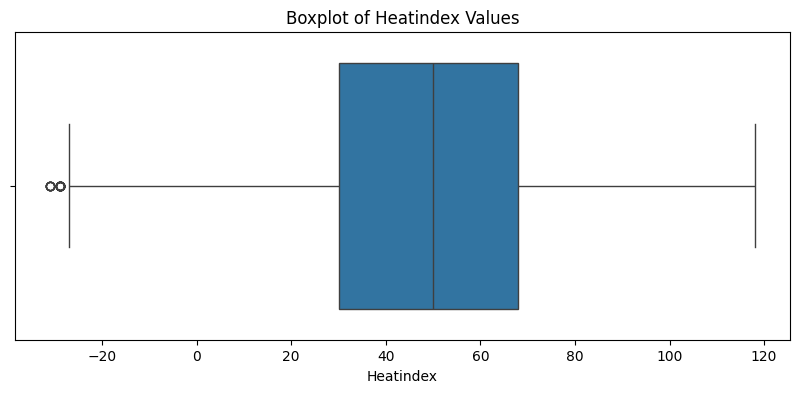

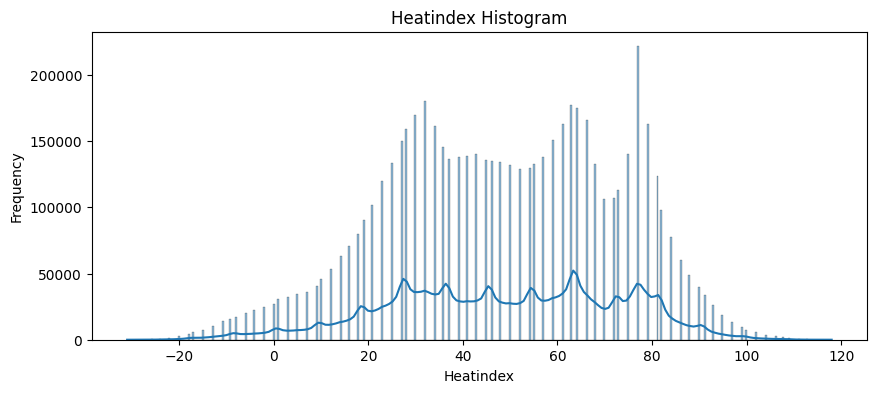

Number of heatindex outliers: 30
                       location         obs_tms_lcl  temperature  wind_speed  \
188515        Herman, Minnesota 2021-02-14 03:00:00          -29           7   
188689        Herman, Minnesota 2021-02-14 04:00:00          -29           7   
188804      Boisberg, Minnesota 2021-02-14 05:00:00          -29           5   
188820  Charlesville, Minnesota 2021-02-14 05:00:00          -29           5   
188863        Herman, Minnesota 2021-02-14 05:00:00          -31           7   

        wind_degree wind_dir weather_descriptions  precip  humidity  \
188515          319       NW        Partly cloudy     0.0        95   
188689          320       NW        Partly cloudy     0.0        95   
188804          314       NW                Clear     0.0        91   
188820          314       NW                Clear     0.0        91   
188863          321       NW        Partly cloudy     0.0        94   

        visibility  pressure  cloudcover  heatindex  dewpoi

In [9]:
# Visualize heatindex distribution using a boxplot
plt.figure(figsize=(10, 4))
sns.boxplot(x=df['heatindex'])
plt.title('Boxplot of Heatindex Values')
plt.xlabel('Heatindex')
plt.show()

# Alternatively, inspect a histogram for a detailed view
plt.figure(figsize=(10, 4))
sns.histplot(df['heatindex'].dropna(), kde=True)
plt.title('Heatindex Histogram')
plt.xlabel('Heatindex')
plt.ylabel('Frequency')
plt.show()

# Display the rows in df where heatindex is considered an outlier using the previously computed bounds
heatindex_outliers = df[(df['heatindex'] < lower_bound) | (df['heatindex'] > upper_bound)]
print("Number of heatindex outliers:", heatindex_outliers.shape[0])
print(heatindex_outliers.head())

Insights:
1. Strong inter-variable correlations indicate that some weather measurements might be redundant.
2. The IQR method successfully identifies extreme heatindex readings (outside the -27 to 125 range).
3. The outlier values call for further inspection to decide if they are valid extreme events or data issues.
4. The daily average temperature trend reveals seasonal and long-term changes.

To Do:

• Check that key merging fields (e.g., date/time, location) have consistent formats and time zones.
• Standardize data types (e.g., ensure dates are datetime objects and numeric fields are appropriate) to align with SCADA data.
• Investigate extreme values further—for example, reexamine or impute outliers flagged by the IQR method.
• Look for temporal trends or seasonal patterns in the weather data that might need smoothing or resampling to match SCADA frequency.
• Validate the consistency and completeness of any additional columns used for merging.
• Consider filtering or transforming variables so that both datasets are on compatible scales.

In [12]:
!jupyter nbconvert --to pdf "Historical_Weather-EDA.pdf"

This application is used to convert notebook files (*.ipynb)
        to various other formats.


Options
The options below are convenience aliases to configurable class-options,
as listed in the "Equivalent to" description-line of the aliases.
To see all configurable class-options for some <cmd>, use:
    <cmd> --help-all

--debug
    set log level to logging.DEBUG (maximize logging output)
    Equivalent to: [--Application.log_level=10]
--show-config
    Show the application's configuration (human-readable format)
    Equivalent to: [--Application.show_config=True]
--show-config-json
    Show the application's configuration (json format)
    Equivalent to: [--Application.show_config_json=True]
--generate-config
    generate default config file
    Equivalent to: [--JupyterApp.generate_config=True]
-y
    Answer yes to any questions instead of prompting.
    Equivalent to: [--JupyterApp.answer_yes=True]
--execute
    Execute the notebook prior to export.
    Equivalent to: [--ExecutePr

[NbConvertApp] WARNING | pattern 'Historical_Weather-EDA.pdf' matched no files


In [13]:
!jupyter nbconvert --to html "Historical_Weather-EDA.ipynb"

[NbConvertApp] Converting notebook Historical_Weather-EDA.ipynb to html
[NbConvertApp] Writing 912527 bytes to Historical_Weather-EDA.html
